In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from PIL import Image
import io

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import e

2023-08-25 18:04:10.885494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["image.cmap"] = 'Accent'
plt.style.use('seaborn-v0_8-bright')

### Stefy's code help

In [3]:
X = []
y = []
classes = ['bike','cars']
base_path = '/home/evangelo/Downloads/data/'
for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        if file.endswith('.bmp'):
        # load the image
            img = load_img(base_path+target+"/"+file)
        # convert it to an array
            img_array = np.array(img)
            if img_array.shape == (480,640,3):
                X.append(img_array)    
        # append the array to X
            
        # append the numeric target to y
                y.append(i)
X = np.array(X)
y = np.array(y)
# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [4]:
pd.DataFrame(X)

ValueError: Must pass 2-d input. shape=(762, 480, 640, 3)

In [5]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [6]:
X.shape

(762, 480, 640, 3)

In [7]:
X = X.reshape((762,-1))

In [8]:
X[0].shape

(921600,)

In [9]:

K.clear_session

<function keras.backend.clear_session()>

In [10]:
K.clear_session() #remember to clear the backend
model = Sequential(
    #now pass in a LIST OF THE LAYERS YOU WANT
    [
    # First layer
    Dense(units=15, input_shape=(921600,) , activation="relu"),
    
    # Second layer
    Dense(units=10, activation="relu"),
    
    # Third layer
    Dense(units=15, activation="relu"),
    
    # Fourth layer
    Dense(units=10, activation="relu"),
        
    # Output layer
    Dense(units=1, activation="sigmoid") # classification layer
] #END OF THE LIST
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                13824015  
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,824,511
Trainable params: 13,824,511
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
training = model.fit(X,y, batch_size=100, epochs=200, validation_split=0.3)

Epoch 1/200


In [11]:
ypred = np.round(model.predict(X))

24/24 [==============================] - 1s 51ms/step


In [12]:
print("Evaluate on our data")
results = model.evaluate(X,y)
print("overall loss, overall acc:", results)

Evaluate on our data
24/24 [==============================] - 1s 54ms/step - loss: 15.6419 - accuracy: 0.5761
overall loss, overall acc: [15.6419095993042, 0.5761154890060425]


In [15]:
import pandas as pd 
logs = pd.DataFrame(training.history)

<Axes: >

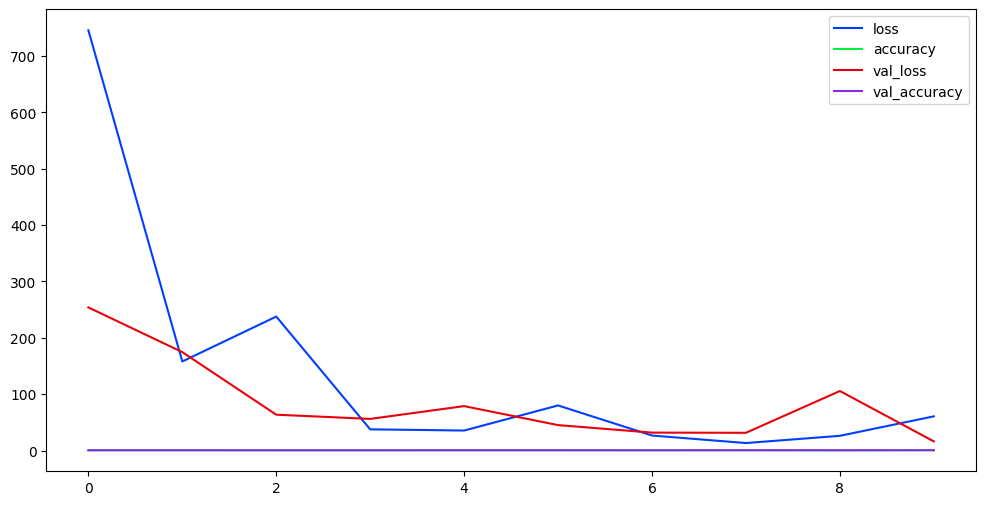

In [16]:
logs.plot()

<Axes: >

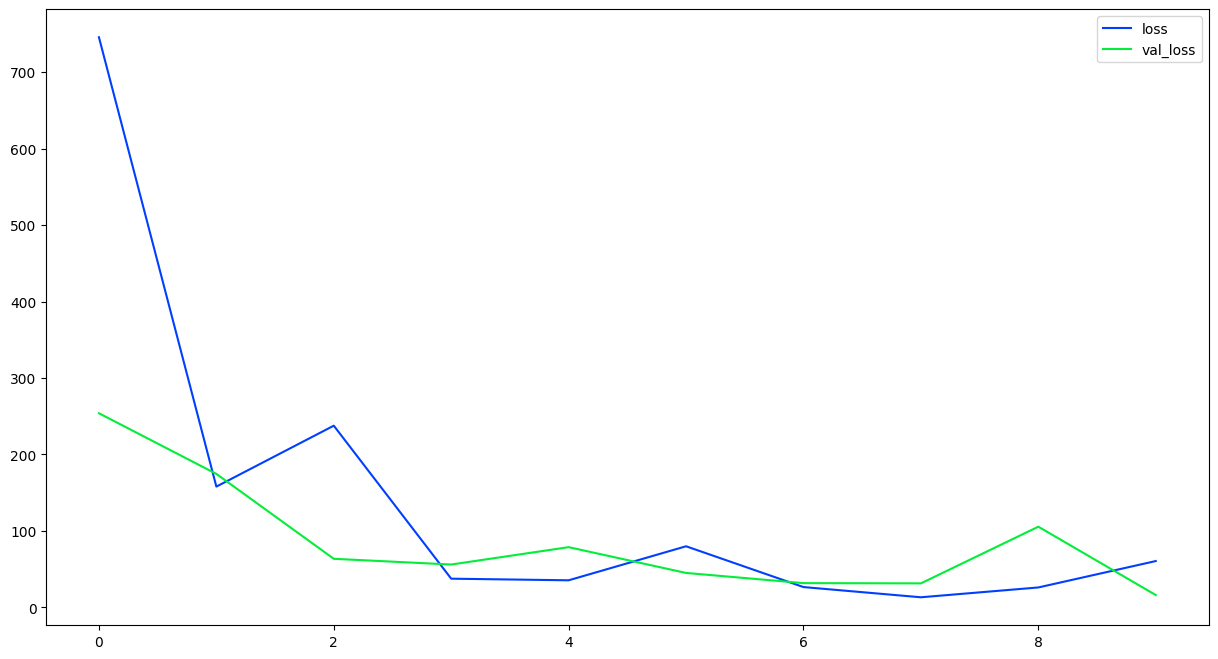

In [31]:
logs[['loss','val_loss']].plot()

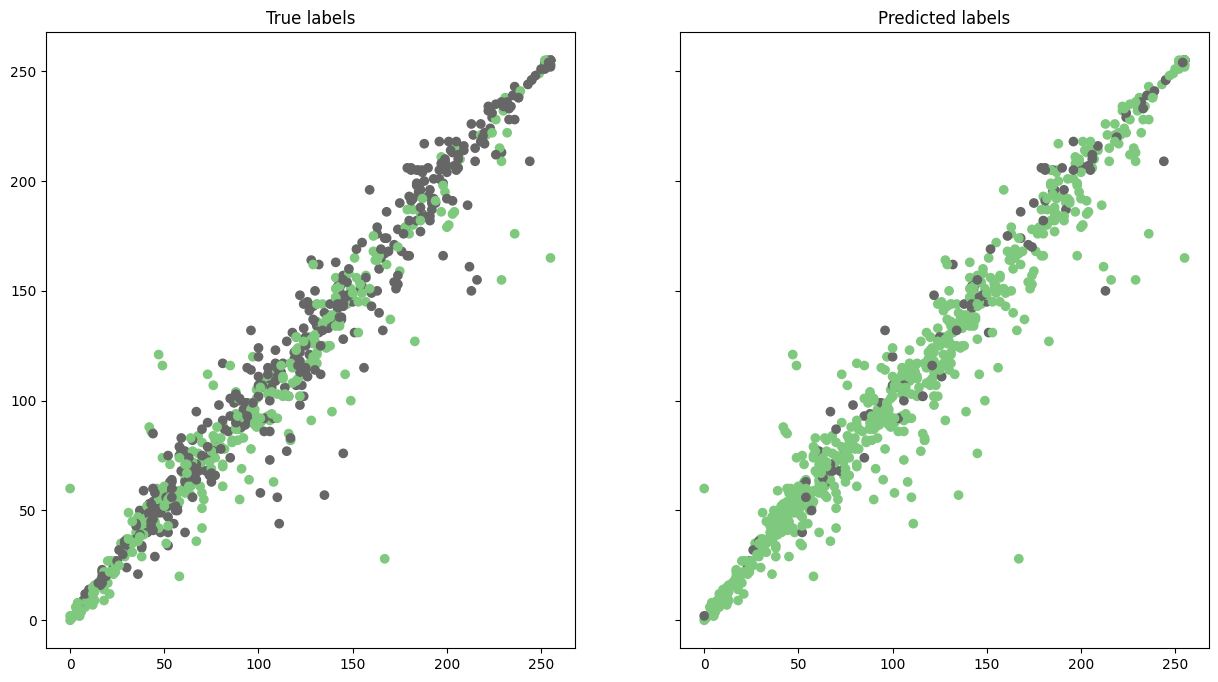

In [17]:
# Plot the original data and the predicions next to each other
plt.rcParams["figure.figsize"] = (15, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X[:, 0], X[:, 1], c=y) # color with original y
ax1.title.set_text("True labels") 
ax2.scatter(X[:, 0], X[:, 1], c=ypred) # color with predicted y
ax2.title.set_text("Predicted labels")

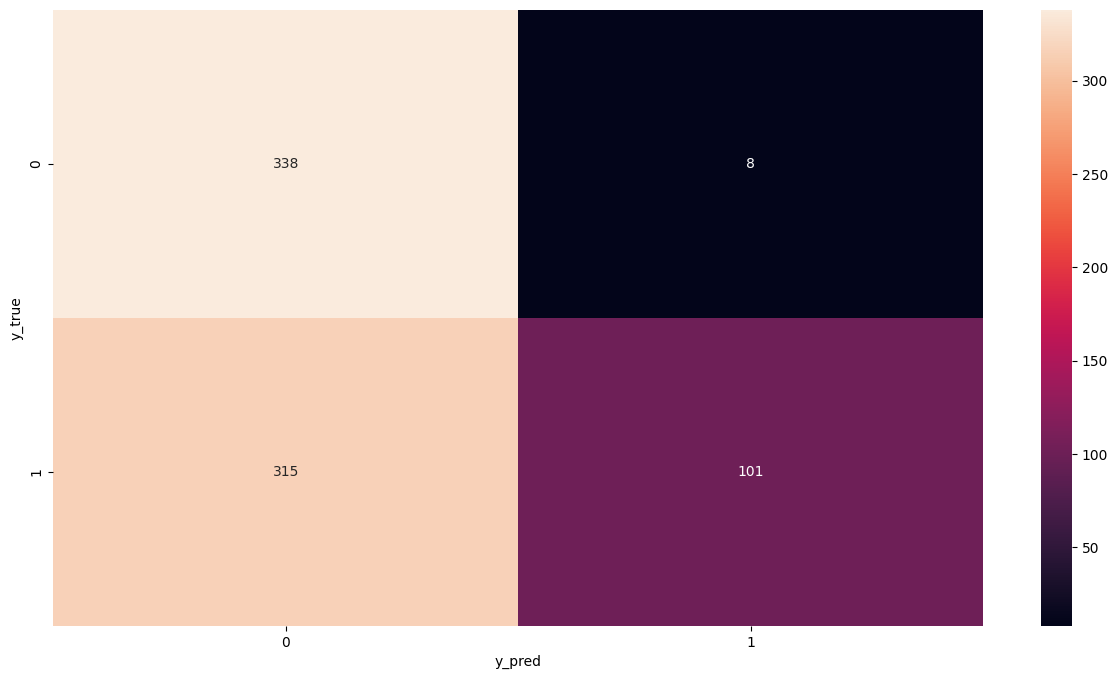

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y,ypred),annot=True,fmt='.3g')
plt.xlabel('y_pred')
plt.ylabel('y_true');

In [19]:
from tensorflow.keras.models import load_model

model.save("model_moons.h5")

In [20]:
model.get_weights()

[array([[-0.00688934,  0.01095235,  0.00776514, ..., -0.00745189,
         -0.00380769, -0.00759662],
        [-0.00737276,  0.00877277,  0.00668331, ..., -0.00496943,
         -0.00177178, -0.00558361],
        [-0.00418457,  0.01084386,  0.00487527, ..., -0.00685935,
         -0.00213733, -0.00598892],
        ...,
        [-0.00557787,  0.00710359,  0.00977466, ..., -0.00756825,
          0.00123316, -0.00624697],
        [-0.00395897,  0.00786465,  0.00768531, ..., -0.00619522,
         -0.00145349, -0.00456603],
        [-0.00605142,  0.01050226,  0.00805695, ..., -0.00550842,
         -0.00230694, -0.00671807]], dtype=float32),
 array([-0.0059895 ,  0.00726798,  0.01058265, -0.00597226,  0.        ,
        -0.00529158,  0.        , -0.00597089, -0.00382591, -0.00268049,
        -0.00106883,  0.0007546 , -0.00561226, -0.00011823, -0.00598911],
       dtype=float32),
 array([[ 0.3877305 , -0.18721867, -0.39273334,  0.41935572,  0.0705169 ,
          0.4787312 , -0.33996487,  0.215

In [21]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

im = image.load_img('/home/evangelo/Downloads/data/bike/bike_010.bmp', target_size=(224, 224))

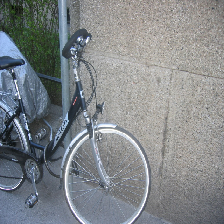

In [23]:
im

In [24]:
a = image.img_to_array(im)
a = preprocess_input(a)

In [25]:
a.shape

(224, 224, 3)

In [26]:
m = MobileNetV2(weights='imagenet', include_top=True)
m.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:
from pprint import pprint

a = a.reshape(1, 224, 224, 3)
p = m.predict(a)
pprint(decode_predictions(p, 10))


1/1 [==============================] - 1s 622ms/step
[[('n03792782', 'mountain_bike', 0.3077366),
  ('n02835271', 'bicycle-built-for-two', 0.15314803),
  ('n03785016', 'moped', 0.036551144),
  ('n04235860', 'sleeping_bag', 0.025561223),
  ('n04482393', 'tricycle', 0.025287928),
  ('n03891332', 'parking_meter', 0.023487423),
  ('n04509417', 'unicycle', 0.01775764),
  ('n03599486', 'jinrikisha', 0.016418817),
  ('n04507155', 'umbrella', 0.011617707),
  ('n04204238', 'shopping_basket', 0.009352011)]]


In [28]:
from tensorflow.keras import Model

intermediate_layer_model = Model(inputs=m.input,
                                 outputs=[
                                     m.get_layer(index=2).output,
                                     m.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(a)
cnn2.shape, cnn100.shape


1/1 [==============================] - 0s 398ms/step


((1, 112, 112, 32), (1, 14, 14, 576))

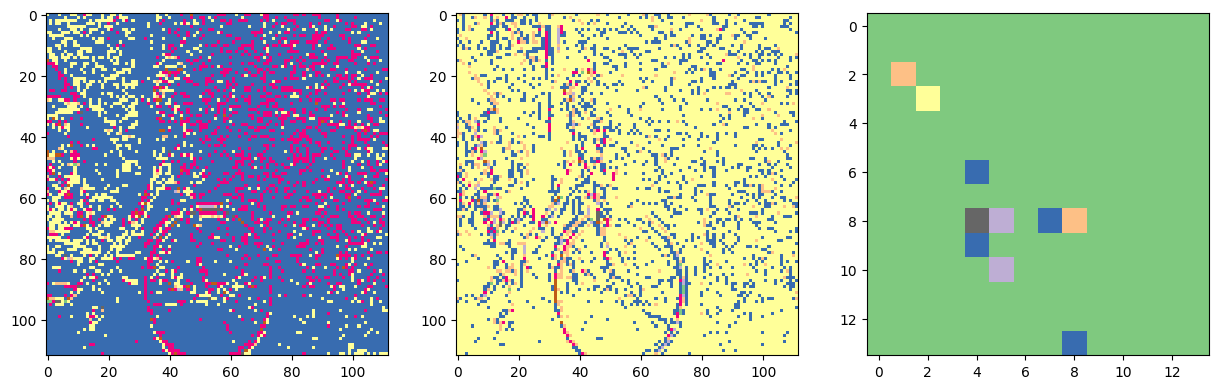

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])
plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])
plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 3])

In [30]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

m = ResNet50() 

base_model = ResNet50(
    include_top=False, # remove the top dense layers
    input_shape=(224,224,3),
    pooling='avg' # average pooling transforms 4d tensor to 2d feature matrix
)

# freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
# add custom layer on top of base model
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')